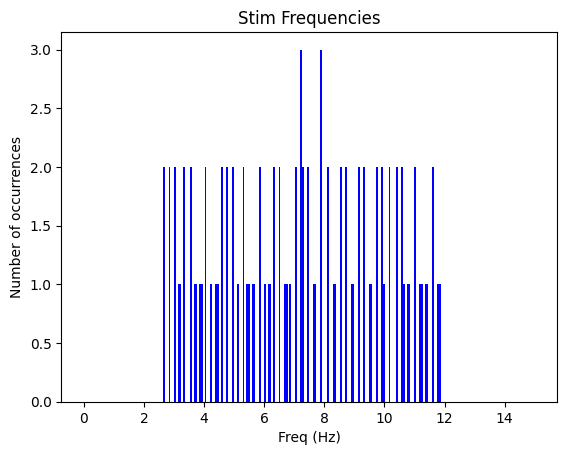

In [8]:
"""
    gil-test-1.py
"""
import matplotlib.pyplot as plt


# ==================== tweak these params as desired:

NUMBER_OF_STIMS = 100
FREQ_MIN = 2.5
FREQ_MAX = 12.0
FREQ_TWIDDLE = 11                       # "it goes to 11"

PLOT_FREQ_MIN = 0                       # 0 min
PLOT_FREQ_MAX = 15                      # 100 max
PLOT_NUM_FREQ_BINS = 250                # 100 to 400 seems good -- default 250
PLOT_RANDS_INSTEAD_OF_FREQS = False     # False is normal stim-freq plots
                                        # or True to see rand-generator distribution
GIL_RAND_SEED = 63
# ====================

# every stim freq gets added to this array:
freqy = []
# glob for gil_rand() --  seed it:
rand_nugget = GIL_RAND_SEED
# we will toggle freqs pos/neg around mid freq:
freq_pos_neg = False


# ===== my little rand func (returns 0 to 100, with pretty uniform dist):
def gil_rand():
    global rand_nugget
    rand_nugget = (51 * rand_nugget + 1) % 800
    return rand_nugget >> 3


# ===== main prog:
freq_mid = (FREQ_MIN + FREQ_MAX) / 2
freq_delta_percent = (freq_mid - FREQ_MIN) / 100

# --- run all the random stims:
for _ in range(NUMBER_OF_STIMS):

    if PLOT_RANDS_INSTEAD_OF_FREQS:
        freqy.append(gil_rand())
    else:
        # and toggle pos/neg freqs around mid:
        freq_pos_neg = not freq_pos_neg
        randy = gil_rand() * FREQ_TWIDDLE / 11
        if freq_pos_neg:
            freqy.append(freq_mid + freq_delta_percent * randy)
        else:
            freqy.append(freq_mid - freq_delta_percent * randy)

# --- compute and display freq histogram:
prange = (PLOT_FREQ_MIN, PLOT_FREQ_MAX)
plt.hist(freqy, PLOT_NUM_FREQ_BINS, prange, color='blue', histtype='bar', rwidth=1)
# annotate:
plt.xlabel('Freq (Hz)')
plt.ylabel('Number of occurrences')
if PLOT_RANDS_INSTEAD_OF_FREQS:
    plt.title("Gils Random Number Generator")
else:
    plt.title("Stim Frequencies")
# and show it:
plt.show()

